#### Importing Modules & Packages!

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import tensorflow as tf
import keras
from keras.models import Model
from keras.layers import Flatten, Dense
from keras.applications import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input
import warnings
warnings.filterwarnings("ignore")
print("Module and Packages imported successfully!")

Module and Packages imported successfully!


#### Data Reading

In [47]:
train_dir = "C:/Users/Ganpati Kumar Roy/College Work/Vikas/Training/"
val_dir = "C:/Users/Ganpati Kumar Roy/College Work/Vikas/Validation/"

In [48]:
def get_files(directory):
    if not os.path.exists(directory):
        return 0
    count=0
    for current_path,dirs,files in os.walk(directory):
        for dr in dirs:
            count+= len(glob.glob(os.path.join(current_path,dr+"/*")))
        return count    

In [49]:
train_samples =get_files(train_dir)
num_classes=len(glob.glob(train_dir+"/*"))
val_samples=get_files(val_dir) 
print("Classes are :- ", num_classes)
print("Total train images :-", train_samples)
print("Total validation images :-", val_samples)

Classes are :-  2
Total train images :- 168
Total validation images :- 37


#### Data Pre-processing and Parameter Tuning

##### Setting Parameter and Hyperparameter

In [50]:
train_datagen=ImageDataGenerator(rescale=1./255, 
                                      rotation_range=30, 
                                      shear_range=0.2, 
                                      zoom_range=0.2, 
                                      validation_split=0.2, 
                                      horizontal_flip=True)

validation_datagen=ImageDataGenerator(rescale=1./255, 
                                      rotation_range=30, 
                                      shear_range=0.2, 
                                      zoom_range=0.2, 
                                      validation_split=0.2, 
                                      horizontal_flip=True)

In [51]:
img_width,img_height =100,100
input_shape=(img_width,img_height,3)
batch_size =32

train_generator =train_datagen.flow_from_directory(train_dir,
                                                   target_size=(img_width,img_height),
                                                   batch_size=batch_size)
validation_generator = validation_datagen.flow_from_directory(
                                                    val_dir, 
                                                    target_size=(img_height, img_width),
                                                    batch_size=batch_size) 

Found 168 images belonging to 2 classes.
Found 37 images belonging to 2 classes.


In [52]:
train_generator.class_indices

{'Disease': 0, 'Normal': 1}

#### Model Building

In [53]:
vgg = VGG16(input_shape=(100,100,3), weights = 'imagenet', include_top = False)
for layer in vgg.layers:
    layer.trainable = False

x = Flatten()(vgg.output)
x = Dense(num_classes, activation = 'sigmoid')(x)
model = Model(inputs = vgg.input, outputs = x)

model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)      

#### Model Training

In [54]:
opt=keras.optimizers.Adam(lr=0.01)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
train=model.fit(train_generator,
                          epochs=50,
                          steps_per_epoch=train_generator.samples // batch_size,
                          validation_data=validation_generator,
                          validation_steps= validation_generator.samples // batch_size,
                          verbose=1)

Epoch 1/50
5/5 [==============================] - 6s 1s/step - loss: 1.2492 - accuracy: 0.5312 - val_loss: 0.9236 - val_accuracy: 0.6250
Epoch 2/50
5/5 [==============================] - 6s 1s/step - loss: 0.7681 - accuracy: 0.6375 - val_loss: 0.7785 - val_accuracy: 0.5938
Epoch 3/50
5/5 [==============================] - 6s 1s/step - loss: 0.6169 - accuracy: 0.7353 - val_loss: 0.5228 - val_accuracy: 0.7812
Epoch 4/50
5/5 [==============================] - 6s 1s/step - loss: 0.5130 - accuracy: 0.7279 - val_loss: 0.6399 - val_accuracy: 0.7188
Epoch 5/50
5/5 [==============================] - 7s 1s/step - loss: 0.4486 - accuracy: 0.8000 - val_loss: 0.5316 - val_accuracy: 0.7500
Epoch 6/50
5/5 [==============================] - 6s 1s/step - loss: 0.4335 - accuracy: 0.7868 - val_loss: 0.5368 - val_accuracy: 0.7500
Epoch 7/50
5/5 [==============================] - 7s 1s/step - loss: 0.3836 - accuracy: 0.8382 - val_loss: 0.4523 - val_accuracy: 0.8125
Epoch 8/50
5/5 [=========================

#### Model Save

In [59]:
from tensorflow.keras.models import load_model
model.save('Vikas.h5')

#### Accuracy and Loss Graph

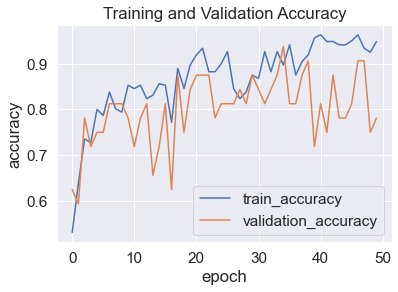

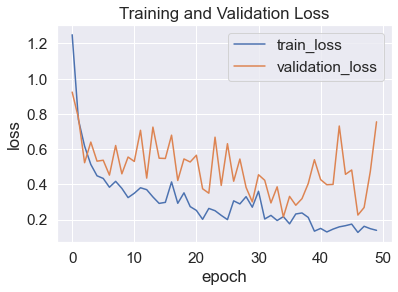

In [60]:
def plot_accuracy(train,title):
    plt.title(title)
    plt.plot(train.history['accuracy']) 
    plt.plot(train.history['val_accuracy']) 
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'validation_accuracy'], loc='best')
    plt.show()
    
def plot_loss(train,title):
    plt.title(title)
    plt.plot(train.history['loss'])
    plt.plot(train.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'validation_loss'], loc='best')
    plt.show()

    
plot_accuracy(train,'Training and Validation Accuracy')
plot_loss(train,'Training and Validation Loss')

#### Model Prediction!

In [61]:
import pandas as pd
predictions = model.predict_generator(generator = validation_generator)
y_pred = [np.argmax(probas) for probas in predictions]
y_test = validation_generator.classes
labels_map = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels_map.items())
predict = [labels[k] for k in y_pred]

filenames = validation_generator.filenames
results = pd.DataFrame({"Filename":filenames,"Predictions":predict})

In [62]:
from skimage import transform
from PIL import Image

def roy_predict(file):
    np_image = Image.open(file)
    np_image = np.array(np_image).astype('float32')/255
    np_image = transform.resize(np_image, (100, 100, 3))
    image = np.expand_dims(np_image, axis = 0)
    pred= model.predict(image)
    k = np.argmax(pred,axis=1)
    clas=labels[k[0]]
    plt.imshow(plt.imread(file))
    plt.title("predicted:" +str(clas))
    plt.show()

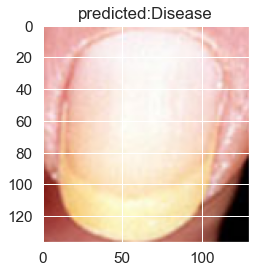

In [63]:
roy_predict("C:/Users/Ganpati Kumar Roy/College Work/Vikas/Training/Disease/401.png")

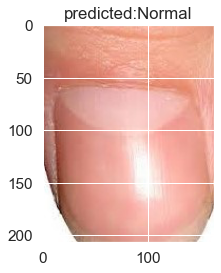

In [64]:
roy_predict("C:/Users/Ganpati Kumar Roy/College Work/Vikas/Training/Normal/23.jpg")